3.356474226846245
3.344504136718817
3.332537406156725
3.3205740911000126
3.3086142484120917
3.296657935932973
3.2847052124542104
3.2727561377570558
3.260810772624797
3.2488691788585142
3.236931419282919
3.224997557784766
3.21306765930648
3.2011417898782337
3.1892200166297737
3.177302407806356
3.1653890327908676
3.1534799621161027
3.1415752674876845
3.1296750217988047
3.1177792991503916
3.105888174871114
3.0940017255336603
3.0821200289747646
3.0702431643158383
3.0583712119813313
3.0465042537191125
3.034642372620081
3.0227856531395996
3.0109341811153705
2.999088043792663
2.98724732984115
2.9754121293775664
2.9635825339872497
2.951758636746786
2.939940532244156
2.9281283166008683
2.9163220874964524
2.904521944187504
2.8927279875343728
2.880940320020016
2.869159045776963
2.8573842706071306
2.845616102008349
2.8338546491960077
2.822100023127677
2.8103523365275707
2.7986117039103933
2.786878241605803
2.7751520677827313
2.7634333024751596
2.7517220676060736
2.740018487013036
2.728322686473336

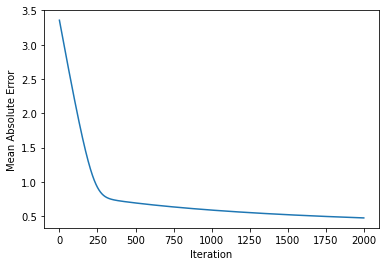

RESULT: 1 - REAL: 0
RESULT: 1 - REAL: 0
RESULT: 1 - REAL: 1
RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 0 - REAL: 0
RESULT: 1 - REAL: 1
RESULT: 1 - REAL: 1
RESULT: 1 - REAL: 1


In [10]:
import random
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, dataFilePath, outputPath, alpha=0.01, maxIter=500, threshold=0.5, 
        errorThreshold = 0.001):
        self.dataFilePath = dataFilePath
        self.outputPath   = outputPath
        self.alpha        = alpha
        self.maxIter      = maxIter
        self.errorThreshold = errorThreshold
        self.threshold      = threshold

        self.loadDataFromFile()
        self.initWeights()

    def loadDataFromFile(self):
        datasetLoaded = np.loadtxt(self.dataFilePath, delimiter=",")
        self.nExamples = datasetLoaded.shape[0]
        self.nAttributes = len(datasetLoaded[0])
        
        self.dataset = np.ones(shape=(self.nExamples, self.nAttributes))
        self.dataset[:, 1:] = datasetLoaded[:,:-1]
        self.target         = datasetLoaded[:,-1]
        self.target.shape   = (self.nExamples, 1)

    def initWeights(self):
        # THETA = [THETA0, THETA1, THETA2, ... , THETA9] - transposto
        self.weights = np.zeros(shape=(self.nAttributes, 1))
        for i in range(0, self.nAttributes):
            self.weights[i][0] = random.random()

    def sigmoidFunction(self):
        linearFunction = self.dataset.dot(self.weights) # THETA(t) * x
        sigmoidFunction = (1.0/(1 + np.exp(-linearFunction)))
        return sigmoidFunction

    def calculateCost(self):
        output = self.sigmoidFunction()
        cost = self.target * np.log(output) + (1 - self.target) * np.log(1 - output)
        cost = -np.average(cost)
        return cost

    def calculateError(self):
        output = self.sigmoidFunction()
        error = output - self.target
        return error
        
    def gradientDescent(self):
        error = self.calculateError()
        for i in range(self.nAttributes):
            temp = self.dataset[:,i]
            temp.shape = (self.nExamples, 1)
            currentErrors = error * temp
            self.weights[i][0] = self.weights[i][0] - self.alpha * (1.0/self.nExamples) * currentErrors.sum()

    def classifyData(self, originalPoint):
        originalPoint.insert(0,1)
        point = np.array(originalPoint)
        linearFunction = point.dot(self.weights)
        sigmoidFunction = (1.0 / (1 + np.exp(-linearFunction)))
        
        if sigmoidFunction >= self.threshold:
            output = 1
        else:
            output = 0
        
        return output

    def plotCostGraph(self, errorsList):

        xAxisValues = range(0, self.maxIter + 1)
        plt.plot(xAxisValues, errorsList)
        plt.xlabel("Iteration")
        plt.ylabel("Mean Absolute Error")
        plt.savefig(self.outputPath + "/error_logreg.png")
        plt.show()

    
    def run(self):
        cost = self.calculateCost()
        count = 0
        errors = list()
        errors.append(abs(cost))
        print(cost)
        
        while abs(cost) > self.errorThreshold and count < self.maxIter:
            self.gradientDescent()
            count += 1
            cost = self.calculateCost()
            errors.append(abs(cost))
            print(cost)
        
        print(self.weights)
        self.plotCostGraph(errors)
        

if __name__ == '__main__':
    logReg = LogisticRegression("./breast-cancer-wisconsin-modified.csv",
                                "./graficos/bcw",
                                maxIter = 2000, threshold = 0.5, alpha = 0.001)
    logReg.run()

    data_to_classify = [[1,1,1,1,2,1,1,1,8,0],[1,1,1,3,2,1,1,1,1,0],[5,10,10,5,4,5,4,4,1,1],[3,1,1,1,2,1,1,1,1,0],[3,1,1,1,2,1,2,1,2,0],[3,1,1,1,3,2,1,1,1,0],
                        [2,1,1,1,2,1,1,1,1,0],[5,10,10,3,7,3,8,10,2,1],[4,8,6,4,3,4,10,6,1,1],[4,8,8,5,4,5,10,4,1,1]]
    count = 1
    for data in data_to_classify:
        result_class = logReg.classifyData(data[:-1])
        print("RESULT: " + str(result_class) + " - REAL: " + str(data[-1]))